# **chapter 04. 다양한 분류 알고리즘 - 럭키백의 확률을 계산하라!**

##04-1 로지스틱 회귀
- k-최근접 이웃 분류기를 이용하여 주변에 있는 생선이 어떤 종류인지 확인 후에 확률을 구하면 된다.

In [1]:
import pandas as pd
fish = pd.read_csv('https://bit.ly/fish_csv_data')
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [2]:
# 어떤 종류의 생선이 있는지 species의 고유한 값을 추출한다.
pd.unique(fish['Species'])

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

In [3]:
# species 열을 타깃 데이터로, 나머지 열을 입력 데이터로 만든다.
fish_input = fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']].to_numpy()
fish_input[:5]

array([[242.    ,  25.4   ,  30.    ,  11.52  ,   4.02  ],
       [290.    ,  26.3   ,  31.2   ,  12.48  ,   4.3056],
       [340.    ,  26.5   ,  31.1   ,  12.3778,   4.6961],
       [363.    ,  29.    ,  33.5   ,  12.73  ,   4.4555],
       [430.    ,  29.    ,  34.    ,  12.444 ,   5.134 ]])

In [4]:
fish_target = fish['Species'].to_numpy()

In [5]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state=42)

In [6]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [7]:
# k-최근접 이웃 분류기의 확률 예측
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier(n_neighbors=3)
kn.fit(train_scaled, train_target)
print(kn.score(train_scaled, train_target))
print(kn.score(test_scaled, test_target))

0.8907563025210085
0.85


- 훈련 세트와 테스트 세트의 타깃 데이터 → 7개의 생선 종류
- 이중 분류 : 타깃 데이터에 2개의 클래스가 포함된 문제 (0, 1로 구분)
- 다중 분류 : 타깃 데이터에 2개 이상의 클래스가 포함된 문제 (문자열 그대로 구분)

In [8]:
print(kn.classes_)
print(pd.unique(fish['Species']))
# 타깃 값을 그대로 사이킷런 모델에 전달하면 순서가 자동으로 알파벳 군으로 매겨진다.

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']
['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']


In [9]:
kn.predict(test_scaled[:5])

array(['Perch', 'Smelt', 'Pike', 'Perch', 'Perch'], dtype=object)

In [10]:
# 테스트 세트에 있는 처음 5개의 샘플에 대한 확률 출력하기
import numpy as np
proba = kn.predict_proba(test_scaled[:5])
np.round(proba, decimals=4)

array([[0.    , 0.    , 1.    , 0.    , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , 0.    , 0.    , 1.    , 0.    ],
       [0.    , 0.    , 0.    , 1.    , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.6667, 0.    , 0.3333, 0.    , 0.    ],
       [0.    , 0.    , 0.6667, 0.    , 0.3333, 0.    , 0.    ]])



```
array([[0.    , 0.    , 1.    , 0.    , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , 0.    , 0.    , 1.    , 0.    ],
       [0.    , 0.    , 0.    , 1.    , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.6667, 0.    , 0.3333, 0.    , 0.    ],
       [0.    , 0.    , 0.6667, 0.    , 0.3333, 0.    , 0.    ]])
```

- [0.    , 0.    , 1.    , 0.    , 0.    , 0.    , 0.    ]
- ['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']
- Perch일 확률이 1이므로 Perch로 판단.

In [11]:
# 네번째 샘플의 이웃 세 개 골라보고 확률 판단해보기
distances, indexes = kn.kneighbors(test_scaled[3:4])
train_target[indexes]

array([['Roach', 'Perch', 'Perch']], dtype=object)

- 나올 수 있는 확률은 0/3, 1/3, 2/3, 3/3

- 로지스틱 회귀는 이름은 회귀이지만 분류 모델이다.
- 선형 회귀와 동일하게 선형 방정식을 학습한다.
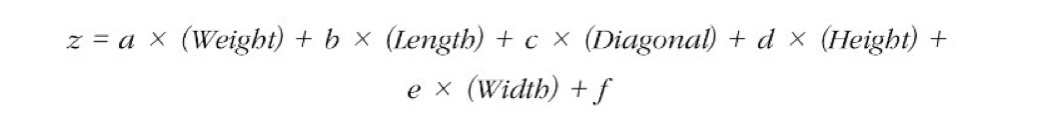

- z는 어떤 값이든 될 수 있다.
- 우리는 확률을 알아내야 하므로, z가 매우 큰 양수일 때에는 1로, z가 매우 작은 음수일 때에는 0으로 바꿔주어야 한다.
- 시그모이드 함수 (로지스틱 함수)
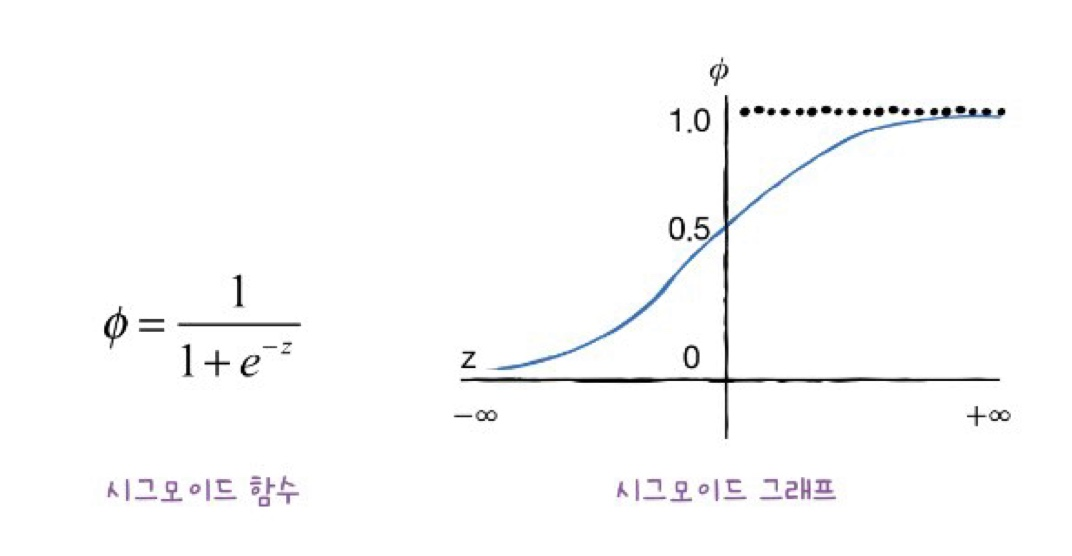

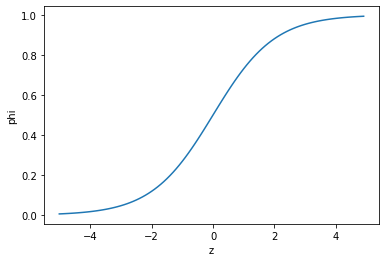

In [12]:
import numpy as np
import matplotlib.pyplot as plt
z = np.arange(-5, 5, 0.1)
phi = 1 / (1 + np.exp(-z))
plt.plot(z, phi)
plt.xlabel('z')
plt.ylabel('phi')
plt.show()

- 이진 분류일 경우 시그모이드 함수의 출력
- 0.5보다 크면 양성 클래스, 0.5보다 작으면 음성 클래스로 판단
- 사이킷런에서는 0.5일 때 음성 클래스로 판단

In [13]:
char_arr = np.array(['A', 'B', 'C', 'D', 'E'])
char_arr[[True, False, True, True, False]]

array(['A', 'C', 'D'], dtype='<U1')

In [14]:
# 도미와 빙어의 행만 골라내기
bream_smelt_indexes = (train_target == 'Bream') | (train_target == 'Smelt')
train_bream_smelt = train_scaled[bream_smelt_indexes]
target_bream_smelt = train_target[bream_smelt_indexes]

In [15]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_bream_smelt, target_bream_smelt)
print(lr.predict(train_bream_smelt[:5]))

['Bream' 'Smelt' 'Bream' 'Bream' 'Bream']


In [16]:
print(lr.predict_proba(train_bream_smelt[:5]))
print(lr.classes_)

[[0.99759855 0.00240145]
 [0.02735183 0.97264817]
 [0.99486072 0.00513928]
 [0.98584202 0.01415798]
 [0.99767269 0.00232731]]
['Bream' 'Smelt']


In [17]:
print(lr.coef_, lr.intercept_)

[[-0.4037798  -0.57620209 -0.66280298 -1.01290277 -0.73168947]] [-2.16155132]


In [18]:
# z값 알아보기
decisions = lr.decision_function(train_bream_smelt[:5])
print(decisions)
 
# 구한 z 값을 시그모이드 함수에 통과시키면 확률을 얻을 수 있음
# phi 함수에 직접 넣어서 구하지 말고, 내장 함수 사용하기
from scipy.special import expit
print(expit(decisions))
# print(lr.predict_proba(train_bream_smelt[:5])) 해서 얻은 확률 값과 동일하다.
# decision_function()은 양성 클래스에 대한 z 값을 반환한다.

[-6.02927744  3.57123907 -5.26568906 -4.24321775 -6.0607117 ]
[0.00240145 0.97264817 0.00513928 0.01415798 0.00232731]


### 로지스틱 회귀로 다중 분류 수행하기
- LogisticRegression 클래스를 사용해 7개의 생선을 분류한다.
- 반복적인 알고리즘을 사용하여 훈련시킨다.
  - max_iter = 1000으로 하여 충분하게 훈련시킨다.
- L2 규제 : 계수의 제곱을 규제한다.
  - 매개변수 C 값이 작을수록 규제가 커진다.
  - 규제를 완화하기 위해서 C의 값을 20으로 설정한다.

In [19]:
lr = LogisticRegression(C=20, max_iter=1000)
lr.fit(train_scaled, train_target)
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.9327731092436975
0.925


In [20]:
print(lr.predict(test_scaled[:5]))

['Perch' 'Smelt' 'Pike' 'Roach' 'Perch']


In [21]:
proba = lr.predict_proba(test_scaled[:5])
print(np.round(proba, decimals=3))
print(lr.classes_)

[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]
['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [22]:
# 다중 분류일 경우 선형 방정식
print(lr.coef_.shape, lr.intercept_.shape)

(7, 5) (7,)


- z를 7개나 계산한다? → 다중 분류는 클래스마다 z 값을 하나씩 계산한다.
- 가장 높은 z값을 출력하는 클래스가 예측 클래스가 된다.
- 소프트맥스 함수를 사용하여 7개의 z 값을 확률로 변환한다.
  - 여러 개의 선형 방정식의 출력값을 0 ~ 1 사이로 압축하고, 전체 합이 1이 되도록 만든다.
  - 나중에 신경망을 배울 때 다시 등장하므로 자세히 익혀두는 것이 좋다.

1. decision_function() 메서드로 z1 ~ z7까지의 값을 구한다.
2. 소프트맥스 함수를 사용해 확률로 바꾼다.

In [23]:
decision = lr.decision_function(test_scaled[:5])
print(np.round(decision, decimals=2))

[[ -6.5    1.03   5.16  -2.73   3.34   0.33  -0.63]
 [-10.86   1.93   4.77  -2.4    2.98   7.84  -4.26]
 [ -4.34  -6.23   3.17   6.49   2.36   2.42  -3.87]
 [ -0.68   0.45   2.65  -1.19   3.26  -5.75   1.26]
 [ -6.4   -1.99   5.82  -0.11   3.5   -0.11  -0.71]]


In [24]:
from scipy.special import softmax
proba = softmax(decision, axis=1)
print(np.round(proba, decimals=3))
# print(np.round(proba, decimals=3))와 동일한 결과 출력

[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]
